In [219]:
%time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import zscore
import scipy.cluster.hierarchy as ch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_columns = None

CPU times: user 5 μs, sys: 0 ns, total: 5 μs
Wall time: 8.82 μs


In [220]:
df = pd.read_csv("archive/merged_data_cleaned.csv")
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [221]:
df.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

## Data Cleaning
Let's drop columns we know are unescessay. But keeps columns that mmight have categorial value. 

In [222]:
df = df.drop(["Unnamed: 0", "Farm.Name", "Lot.Number", "Mill", "ICO.Number", "Region", 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Grading.Date', 'Owner', 'Certification.Body', 'Certification.Address', 'Certification.Contact', 'Expiration', 'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters', 'Owner.1', 'Altitude', 'Producer', 'Company', 'Harvest.Year'], axis=1)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1339 non-null   object 
 1   Country.of.Origin     1338 non-null   object 
 2   Variety               1113 non-null   object 
 3   Processing.Method     1169 non-null   object 
 4   Aroma                 1339 non-null   float64
 5   Flavor                1339 non-null   float64
 6   Aftertaste            1339 non-null   float64
 7   Acidity               1339 non-null   float64
 8   Body                  1339 non-null   float64
 9   Balance               1339 non-null   float64
 10  Uniformity            1339 non-null   float64
 11  Clean.Cup             1339 non-null   float64
 12  Sweetness             1339 non-null   float64
 13  Cupper.Points         1339 non-null   float64
 14  Total.Cup.Points      1339 non-null   float64
 15  Moisture             

In [224]:
df.sample(5)

,Species,Country.of.Origin,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters
826,Arabica,Mexico,Bourbon,Washed / Wet,7.58,7.50,7.25,7.58,7.50,7.25,10.0,10.0,10.0,7.25,81.92,0.12,0,0.0,Green,6,1300.0
304,Arabica,Colombia,Caturra,Washed / Wet,7.67,7.67,7.67,7.92,7.50,7.67,10.0,10.0,10.0,7.67,83.75,0.00,0,0.0,Green,5,1775.0
964,Arabica,Nicaragua,Catuai,Washed / Wet,7.08,7.50,7.33,7.17,7.42,7.25,10.0,10.0,10.0,7.50,81.25,0.10,0,0.0,Green,4,1100.0
580,Arabica,Guatemala,Bourbon,Washed / Wet,7.50,7.67,7.17,7.67,7.67,7.58,10.0,10.0,10.0,7.50,82.75,0.11,0,0.0,Green,4,1700.0
749,Arabica,El Salvador,Other,Washed / Wet,7.75,7.33,7.33,7.50,7.50,7.50,10.0,10.0,10.0,7.33,82.25,0.00,2,0.0,Green,5,NaN


In [225]:
df.isna().sum()

Species                   0
Country.of.Origin         1
Variety                 226
Processing.Method       170
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Cupper.Points             0
Total.Cup.Points          0
Moisture                  0
Category.One.Defects      0
Quakers                   1
Color                   270
Category.Two.Defects      0
altitude_mean_meters    230
dtype: int64

In [226]:
df.columns

Index(['Species', 'Country.of.Origin', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'altitude_mean_meters'],
      dtype='object')

Too keep maximal information we fill out the missing values with mean values and modes for nominal data. We might change this for model optimization

In [227]:
df = df.fillna({'Variety': df['Variety'].mode()[0]})
df = df.fillna({'Processing.Method': df['Processing.Method'].mode()[0]})
df = df.fillna({'Color': df['Color'].mode()[0]})
df = df.fillna({'altitude_mean_meters': df['altitude_mean_meters'].mode()[0]})

In [228]:
df.isna().sum()

Species                 0
Country.of.Origin       1
Variety                 0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 1
Color                   0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

In [229]:
# Remove rows with missing quakers or country
df = df.dropna(how='any')

In [230]:
df.isna().sum()

Species                 0
Country.of.Origin       0
Variety                 0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

In [231]:
df.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,7.567307,7.520890,7.401683,7.536073,7.517405,7.517853,9.834630,9.834862,9.856477,7.503508,82.091047,0.088355,0.480180,0.173523,3.557966,1676.558620
std,0.377181,0.398161,0.403845,0.379575,0.370333,0.409200,0.554969,0.764491,0.616538,0.473763,3.502014,0.048319,2.551524,0.832419,5.316323,7897.334433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,1200.000000
50%,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1250.000000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1550.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000


<Axes: >

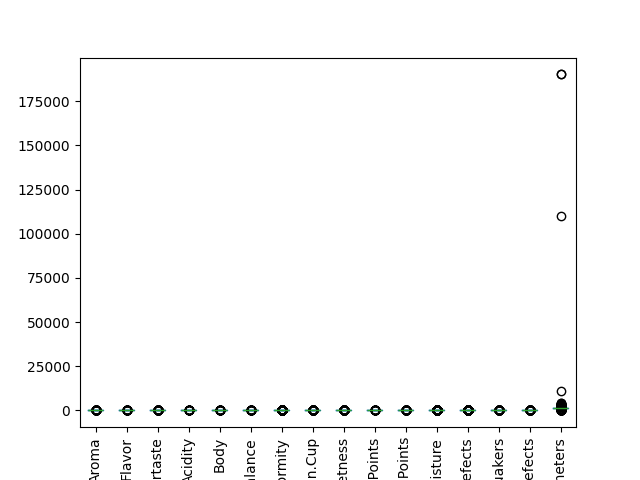

In [232]:
df.plot.box(rot=90)

In [233]:
df['altitude_mean_meters'].plot.box()

<Axes: >

In [234]:
# We'll remove the outlying rows based on z-score
df = df[np.abs(zscore(df['altitude_mean_meters'])) < 2.5]

In [235]:
df['altitude_mean_meters'].plot.box()

<Axes: >

In [236]:
df['Moisture'].plot.box()

<Axes: >

<Axes: ylabel='Frequency'>

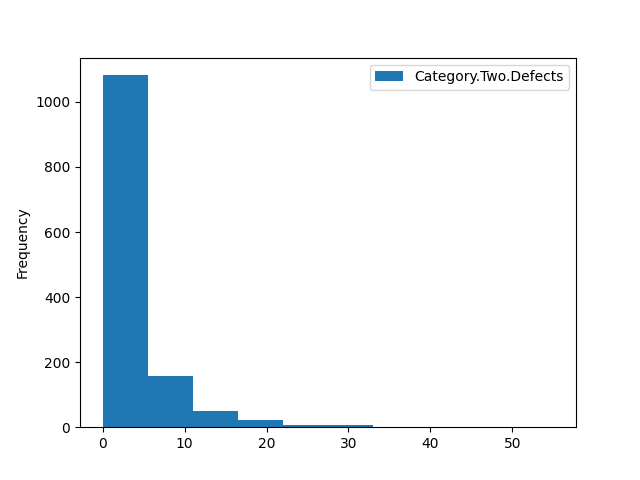

In [237]:
df[['Category.Two.Defects']].plot.hist()

<Axes: ylabel='Frequency'>

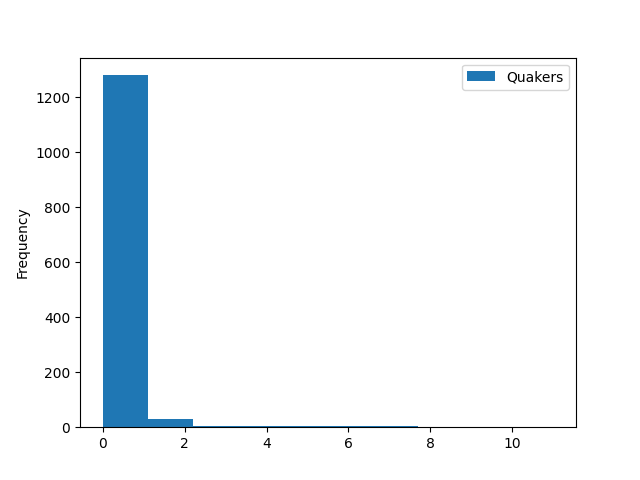

In [238]:
# we're gonna keep these outlying values, as they might have a high impact on the quality score
df[['Quakers']].plot.hist()

## Data Exploration

A mixed bag! It seems like especially African countries is found in the top half
Lets find out hoW the features contribute to the Total Cup Score:

In [239]:
# lets see which countries can boast the highest cup grades
df.groupby('Country.of.Origin')['Total.Cup.Points'].mean().reset_index().sort_values(by='Total.Cup.Points', ascending=False)

,Country.of.Origin,Total.Cup.Points
23,Papua New Guinea,85.750000
8,Ethiopia,85.484091
14,Japan,84.670000
31,United States,84.433000
15,Kenya,84.309600
22,Panama,83.707500
30,Uganda,83.451944
3,Colombia,83.104396
7,El Salvador,83.052857
2,China,82.927500


Seems like a mixed bag from around the world. There seems to bare a small majority of african countries in the top half


<Axes: xlabel='Species'>

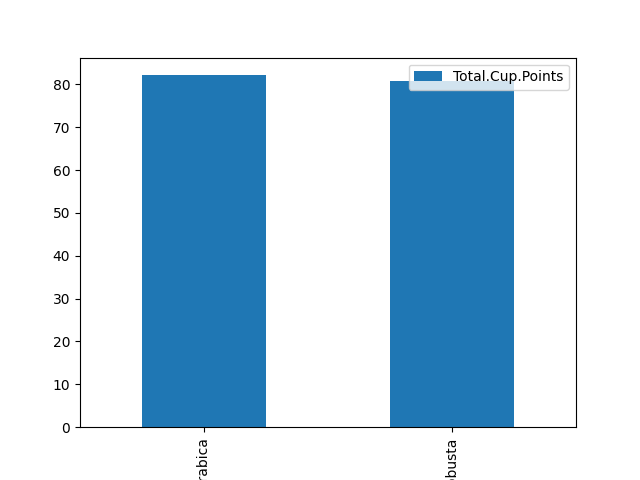

In [240]:
df.groupby('Species')['Total.Cup.Points'].mean().reset_index().sort_values(by='Total.Cup.Points', ascending=False).plot.bar(x='Species')

Surprinsingly, The Robusta species does not seem to have a much lower average score than Arabica, which we thought were far superior in taste

In [241]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters
Aroma,1.000000,0.812638,0.776179,0.722760,0.674379,0.709721,0.368136,0.336919,0.254585,0.687628,0.791953,-0.133450,-0.097060,0.009238,-0.149636,0.080376
Flavor,0.812638,1.000000,0.895429,0.816159,0.736922,0.793231,0.412178,0.397993,0.291929,0.793569,0.874532,-0.144780,-0.089334,0.005616,-0.192489,0.092657
Aftertaste,0.776179,0.895429,1.000000,0.791769,0.736195,0.811241,0.403210,0.388155,0.267566,0.785996,0.861328,-0.180045,-0.105536,0.001764,-0.211162,0.084832
Acidity,0.722760,0.816159,0.791769,1.000000,0.707662,0.733812,0.376720,0.301893,0.262823,0.698450,0.797244,-0.128805,-0.084698,-0.014671,-0.136957,0.121091
Body,0.674379,0.736922,0.736195,0.707662,1.000000,0.757572,0.326854,0.276537,0.268253,0.633184,0.757407,-0.147369,-0.044665,-0.002568,-0.085595,0.087002
Balance,0.709721,0.793231,0.811241,0.733812,0.757572,1.000000,0.401214,0.370546,0.283431,0.721150,0.828732,-0.199599,-0.082560,0.008430,-0.171283,0.094113
Uniformity,0.368136,0.412178,0.403210,0.376720,0.326854,0.401214,1.000000,0.525932,0.450653,0.359780,0.656882,0.013523,-0.105904,0.030970,-0.146094,0.044631
Clean.Cup,0.336919,0.397993,0.388155,0.301893,0.276537,0.370546,0.525932,1.000000,0.440330,0.357111,0.659216,-0.015130,-0.115600,0.027977,-0.232977,0.045989
Sweetness,0.254585,0.291929,0.267566,0.262823,0.268253,0.283431,0.450653,0.440330,1.000000,0.216270,0.554284,0.072563,-0.150863,0.011813,-0.025184,0.008843
Cupper.Points,0.687628,0.793569,0.785996,0.698450,0.633184,0.721150,0.359780,0.357111,0.216270,1.000000,0.790102,-0.181704,-0.030310,0.011098,-0.192049,0.070088


<Axes: >

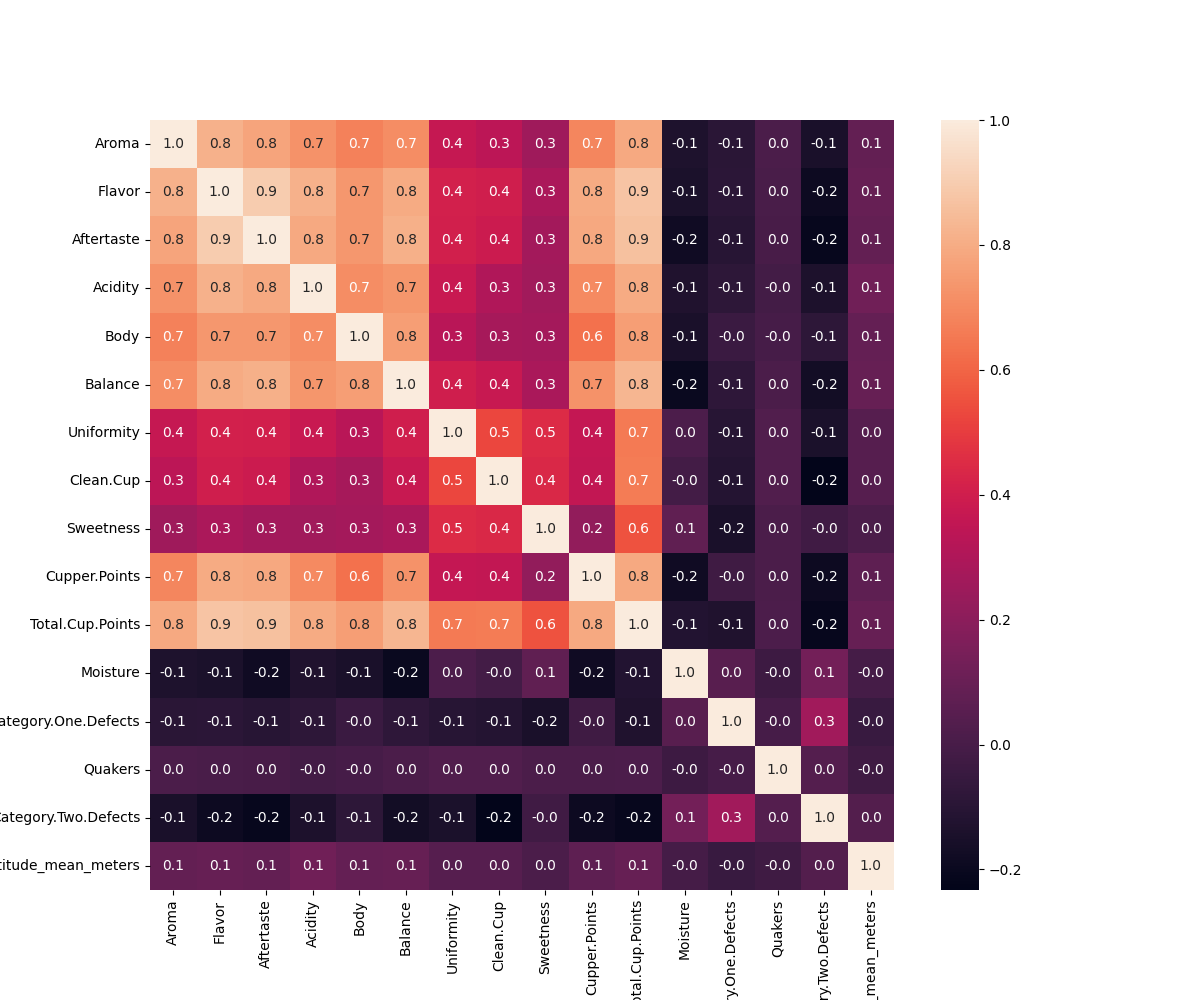

In [242]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, annot = True, fmt = ".1f")

Okay, so unsurprisingly the different flavor parameters seems to correlate a lot with the Total Cup Points, but also with each other. It seems that the main parameters that drags down the score is the amount of Category One and Two Defects, which we also suspected. Quakers doesn't seem to have a big impact on the overall Cup Point score

In [243]:
df.dtypes

Species                  object
Country.of.Origin        object
Variety                  object
Processing.Method        object
Aroma                   float64
Flavor                  float64
Aftertaste              float64
Acidity                 float64
Body                    float64
Balance                 float64
Uniformity              float64
Clean.Cup               float64
Sweetness               float64
Cupper.Points           float64
Total.Cup.Points        float64
Moisture                float64
Category.One.Defects      int64
Quakers                 float64
Color                    object
Category.Two.Defects      int64
altitude_mean_meters    float64
dtype: object

Lets label encode the categorical data, so we can see how that affects the correlation score as well

In [244]:
le = LabelEncoder()
cols_to_enc = df.select_dtypes(include='object').columns
enc_df = df.copy()

for col in cols_to_enc:
    enc_df[col] = le.fit_transform(df[col]).astype(int)

enc_df


,Species,Country.of.Origin,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters
0,0,8,5,4,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,2,0,2075.0
1,0,8,15,4,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,2,1,2075.0
2,0,9,2,4,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,2,0,1700.0
3,0,8,5,0,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,2,2,2000.0
4,0,8,15,4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,2,2,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1,6,5,4,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,0,1,1200.0
1335,1,6,5,4,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,0,0,40.0
1336,1,31,5,0,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00,0,0.0,2,6,795.0
1337,1,12,5,0,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10,20,0.0,2,1,1200.0


In [245]:
# lets see how much variance it give us
df.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,7.567706,7.521244,7.402211,7.536282,7.517759,7.518268,9.834760,9.834993,9.856657,7.503951,82.094190,0.088298,0.481259,0.170915,3.561469,1312.766772
std,0.377478,0.398521,0.404132,0.379918,0.370669,0.409553,0.555384,0.765199,0.617038,0.474189,3.505144,0.048357,2.554291,0.826707,5.320801,518.202744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1200.000000
50%,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1250.000000
75%,7.750000,7.750000,7.647500,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1550.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,11000.000000


In [246]:
df.groupby('Country.of.Origin')['Total.Cup.Points'].mean().reset_index().sort_values(by='Total.Cup.Points', ascending=False)

,Country.of.Origin,Total.Cup.Points
23,Papua New Guinea,85.750000
8,Ethiopia,85.484091
14,Japan,84.670000
31,United States,84.433000
15,Kenya,84.309600
22,Panama,83.707500
30,Uganda,83.451944
3,Colombia,83.104396
7,El Salvador,83.052857
2,China,82.927500


In [247]:
df.groupby('Country.of.Origin').size().sort_values(ascending=False).plot.bar(ylabel='Count')

<Axes: xlabel='Country.of.Origin', ylabel='Count'>

<Axes: >

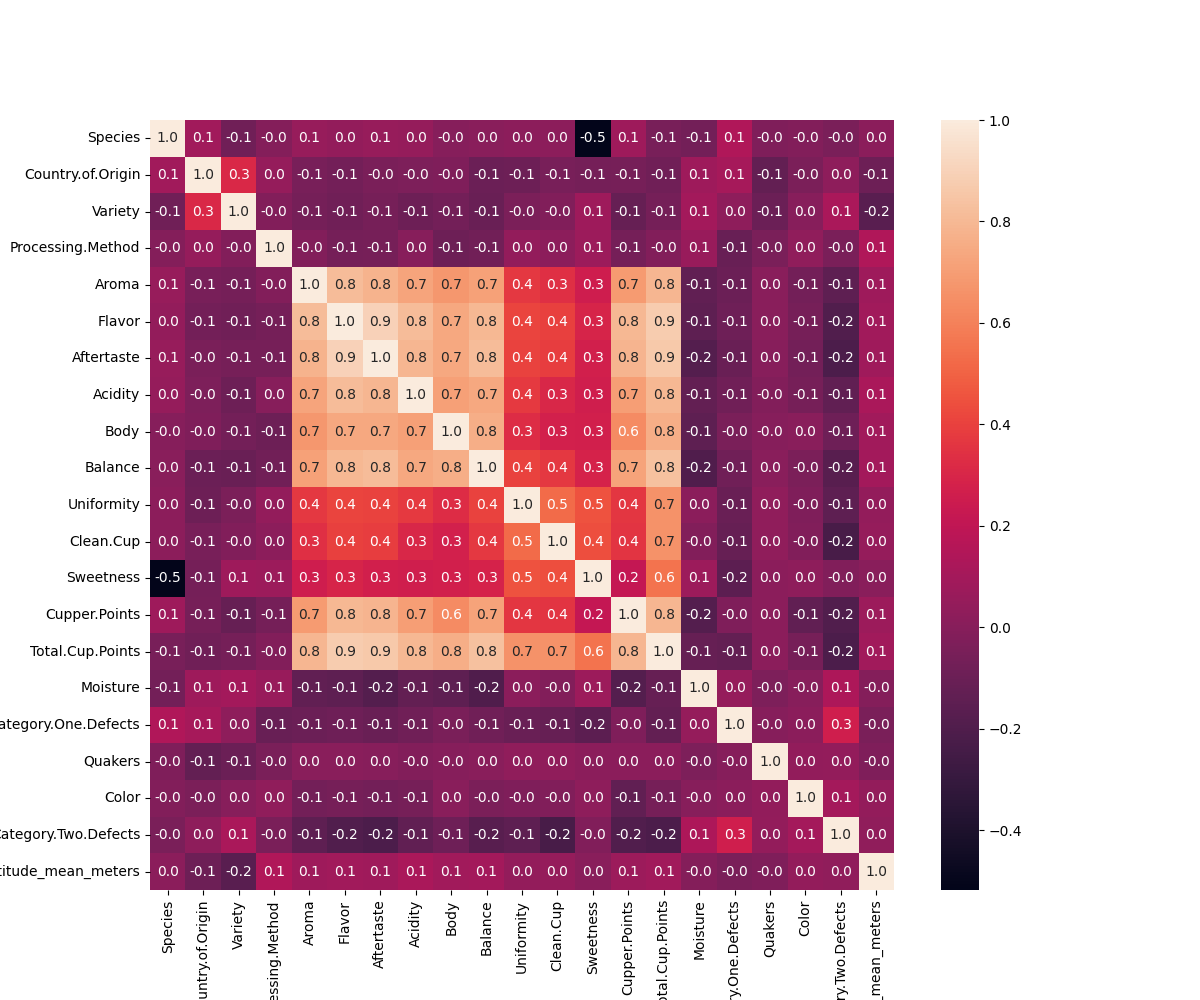

In [248]:
enc_corr_mat = enc_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(enc_corr_mat, annot = True, fmt = ".1f")

The species of the coffee seems to have a significant impact of the sweetnes of the coffee

<Axes: xlabel='Species'>

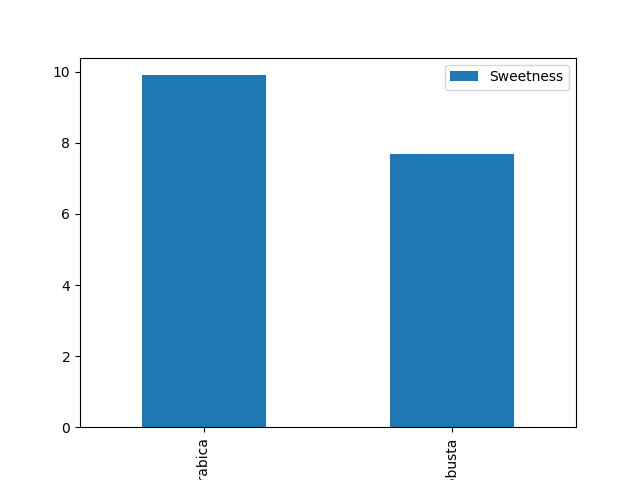

In [249]:
# Sweetnes grouped by species
df.groupby('Species')['Sweetness'].mean().reset_index().plot.bar(x='Species')

<Axes: xlabel='Country.of.Origin'>

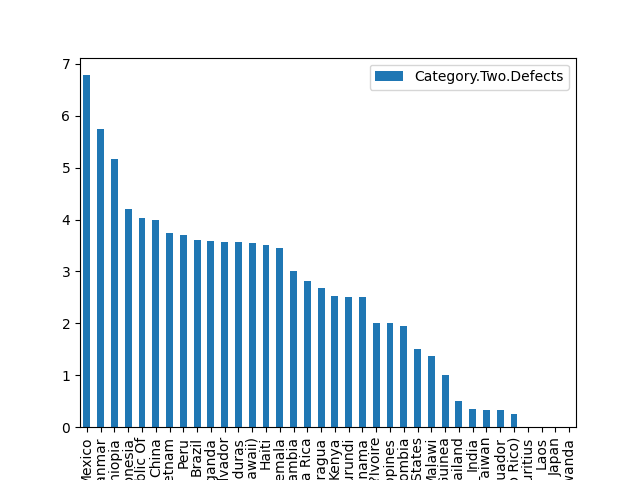

In [250]:
df.groupby('Country.of.Origin')['Category.Two.Defects'].mean().reset_index().sort_values(by='Category.Two.Defects', ascending=False).plot.bar(x='Country.of.Origin')

<Axes: xlabel='Country.of.Origin'>

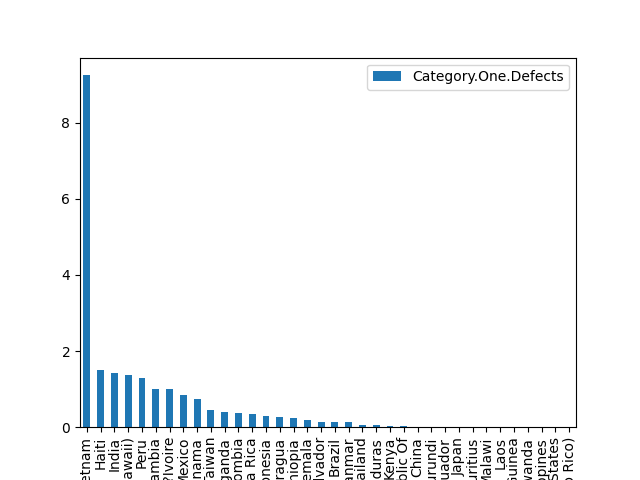

In [251]:
df.groupby('Country.of.Origin')['Category.One.Defects'].mean().reset_index().sort_values(by='Category.One.Defects', ascending=False).plot.bar(x='Country.of.Origin')



Interestingly though, we also find Ethiopia among the countries with the highest mean in Category 2 defect parameters, even though it is the country with the averagely highest scoring coffee.
This indicates that it takes rather large amounts of defects in the coffee to really make an impact on the overall score.

## Clustering model training

We'll try to extract more information with clustering models. For this purpose we drop our previous target feature "Total Cup Points" and scale the feature values in the dataset, so we can do a principal component analysis

In [252]:
# df_cls = enc_df.drop('Total Cup Points', axis=1)
df_cls = enc_df.copy()

In [253]:
df_cls[df_cls.columns] = sk.preprocessing.StandardScaler().fit_transform(df_cls)

In [254]:
df_cls.sample(5)

,Species,Country.of.Origin,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters
912,-0.146422,-0.280977,-0.598992,0.560207,-0.179432,-0.053328,-0.178750,-0.306186,-0.938545,-0.655273,0.297635,0.215721,0.232396,-0.366976,-0.169583,0.242077,-0.188483,-0.206819,0.391965,0.270461,0.168401
161,-0.146422,-0.959829,-0.598992,0.560207,0.933632,0.775045,1.058935,0.773400,0.167979,0.150786,0.297635,0.215721,0.232396,0.877721,0.686623,0.448952,-0.188483,-0.206819,0.391965,-0.669599,0.747542
74,-0.146422,-0.668893,-0.598992,0.560207,1.357656,0.775045,1.058935,1.431684,0.842689,0.761436,0.297635,0.215721,0.232396,0.877721,0.949193,-1.619793,-0.188483,-0.206819,0.391965,-0.669599,0.168401
172,-0.146422,-0.087019,0.049066,-1.317471,0.271094,0.373409,1.058935,0.115116,0.842689,0.761436,0.297635,0.215721,0.232396,1.046494,0.663791,-1.826668,-0.188483,-0.206819,-3.290295,-0.105563,0.168401
800,-0.146422,0.300896,-0.274963,0.560207,-0.179432,-0.254146,-0.178750,0.115116,-0.506730,-0.044622,0.297635,0.215721,0.232396,-0.366976,-0.026882,0.862701,-0.188483,-0.206819,-1.449165,-0.481587,2.291919


In [255]:
pca = PCA()
pca.fit(df_cls)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# 3 principal components
cumulative_variance[2]

np.float64(0.49841573334280104)

/tmp/ipykernel_15224/3103998374.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


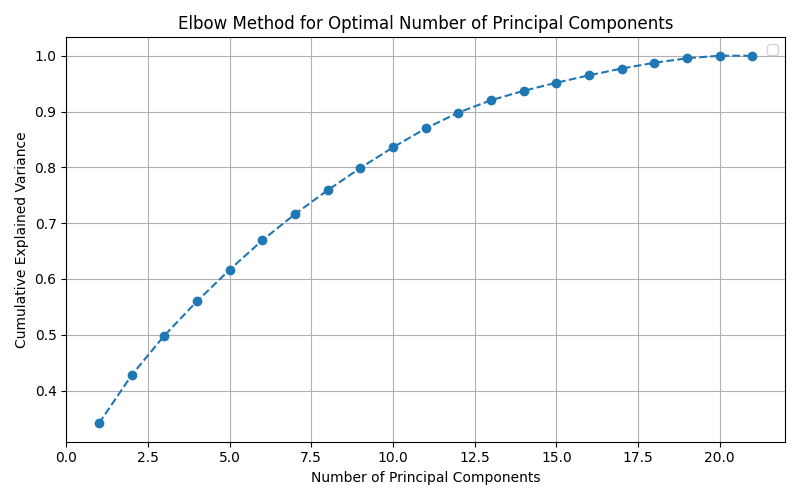

In [256]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Optimal Number of Principal Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Not as much as we hoped for. For 3 principal components, we get just above 50% explained variance, which is not a lot. Lets try and extract high correlating features and do the PCA again

In [257]:
df_cls_ext = enc_df[["Aroma","Flavor","Acidity","Body","Balance","Aftertaste","Uniformity", "Sweetness", "Cupper.Points", "Total.Cup.Points"]].copy()
df_cls_ext[df_cls_ext.columns] = sk.preprocessing.StandardScaler().fit_transform(df_cls_ext)

In [258]:
pca = PCA()
pca.fit(df_cls_ext)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# 3 principal components
cumulative_variance[2]

np.float64(0.850859344084056)

/tmp/ipykernel_15224/3103998374.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


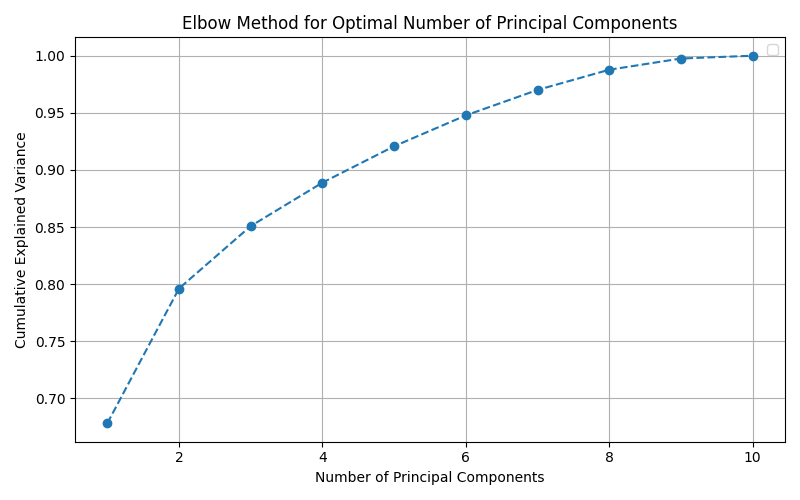

In [259]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Optimal Number of Principal Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Now we retain just above 85% of explained variance with 3 principal components. Much better!

In [260]:
pca_3 = PCA(n_components=3)
pca_3_result = pca_3.fit_transform(df_cls_ext)
dataset_pca = pd.DataFrame(abs(pca_3.components_), columns=df_cls_ext.columns, index=['PC_1', 'PC_2', 'PC_3'])
dataset_pca

,Aroma,Flavor,Acidity,Body,Balance,Aftertaste,Uniformity,Sweetness,Cupper.Points,Total.Cup.Points
PC_1,0.327928,0.358505,0.333170,0.317548,0.338955,0.354414,0.209078,0.159432,0.323413,0.371311
PC_2,0.129851,0.123828,0.128969,0.129825,0.099837,0.140305,0.577796,0.713580,0.157725,0.191683
PC_3,0.010821,0.002081,0.032633,0.225506,0.042127,0.016575,0.734595,0.628004,0.107423,0.018784


Here are our components. With PC1 weighted across most parameters, PC2 mostly weighted by Sweetness and Uniformity and PC3 weighted mainly by Uniformity

In [261]:
df_pca = pd.DataFrame(pca_3_result, columns=['PC_1', 'PC_2', 'PC_3'])
df_pca.head()

,PC_1,PC_2,PC_3
0,7.749826,-1.815253,-0.380732
1,7.122590,-1.627785,-0.367934
2,6.834252,-1.579968,-0.141413
3,6.218718,-1.384949,-0.356096
4,6.055541,-1.326569,-0.352673


<Axes: >

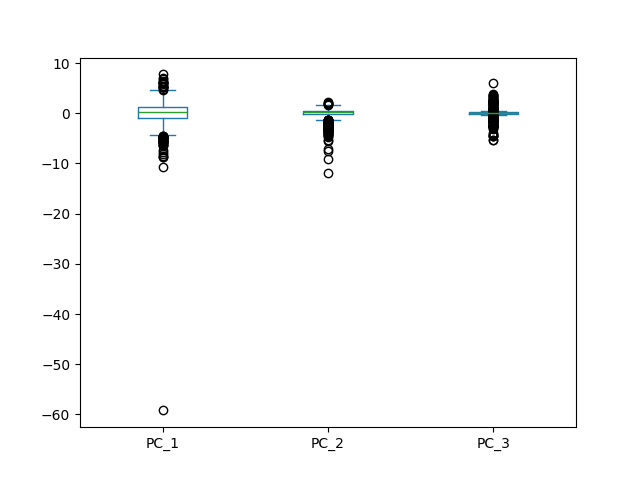

In [262]:
df_pca.plot.box()

We have also introduced some serious outliers. Lets remove them

In [263]:
z_scores = np.abs(zscore(df_pca))
df_pca = df_pca[(z_scores < 3).all(axis=1)]

<Axes: >

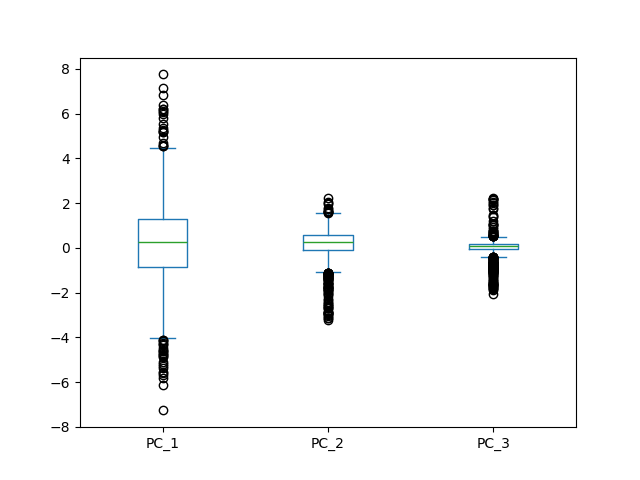

In [264]:
df_pca.plot.box()

Text(0.5, 0, 'PC 3')

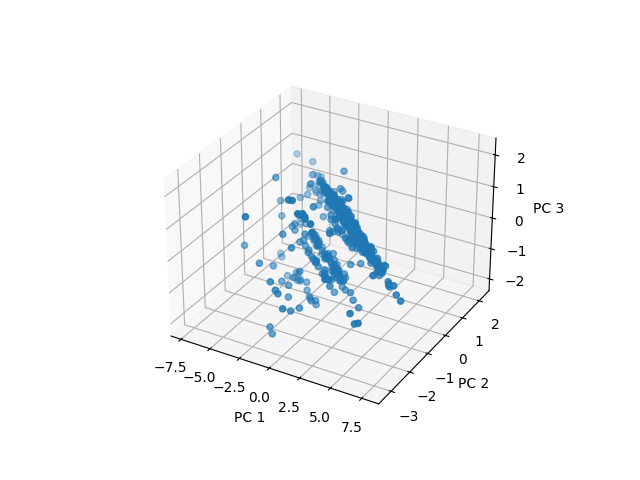

In [265]:
%matplotlib ipympl
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC_1'], df_pca['PC_2'], df_pca['PC_3'])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

Here is our 3D points.
Let's start with doing doing a K-means clustering algorithm. First we need to find the optimal K (Number of clusters)

In [266]:
# Calculating optimal number of clusters in a K-means algorithm using silhouette score
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df_pca)
    score = sk.metrics.silhouette_score(df_pca, model.labels_, metric='euclidean', sample_size=len(df_pca))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append([k, score])


Number of clusters = 2
Silhouette score = 0.462663489290716

Number of clusters = 3
Silhouette score = 0.44663995123655587

Number of clusters = 4
Silhouette score = 0.4233479749953819

Number of clusters = 5
Silhouette score = 0.4059965494745622

Number of clusters = 6
Silhouette score = 0.42891566419305105

Number of clusters = 7
Silhouette score = 0.41546157013652635

Number of clusters = 8
Silhouette score = 0.4280710991556359

Number of clusters = 9
Silhouette score = 0.4187845703147688


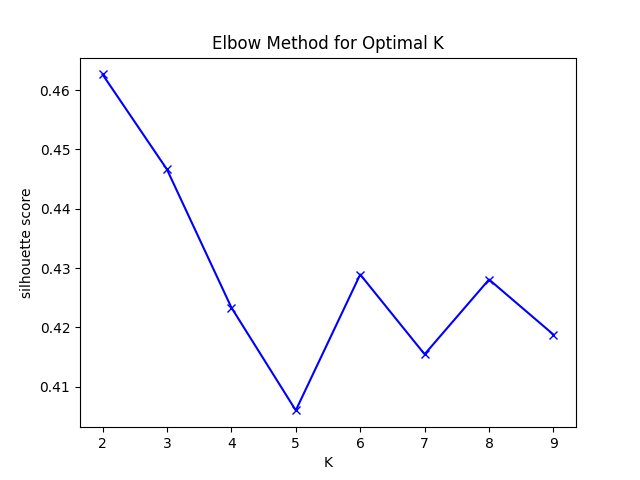

In [267]:
score_df = pd.DataFrame(scores, columns=['k', 'scores'])
fig = plt.figure()
plt.title('Elbow Method for Optimal K')
plt.plot(score_df.k, score_df.scores, 'bx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [268]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10) 
prediction = kmeans.fit_predict(df_pca)

In [269]:
prediction

array([0, 0, 0, ..., 0, 0, 1], shape=(1272,), dtype=int32)

Text(0.5, 0, 'PC 3')

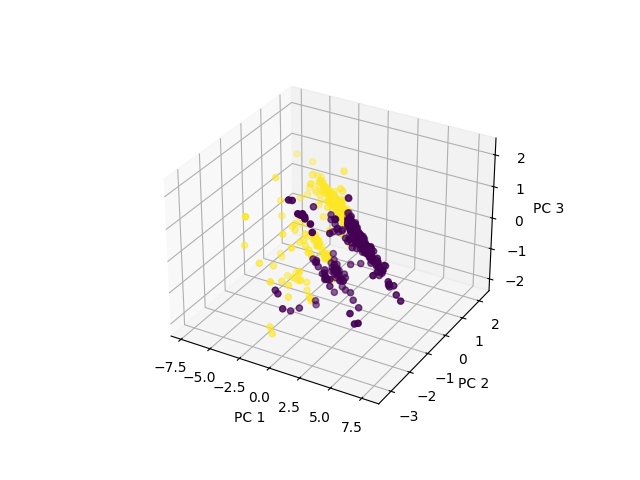

In [270]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC_1'], df_pca['PC_2'], df_pca['PC_3'], c=prediction)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

Well, the K-means method doesn't seem to agree with us. Lets try doing agglomerative clustering instead

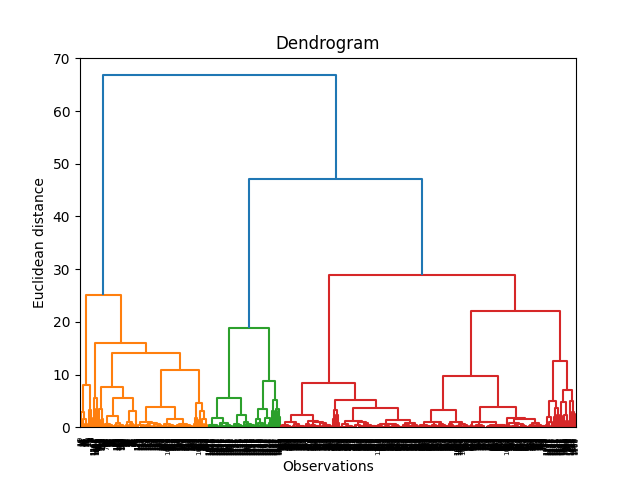

In [271]:
# Dendogram for agglomerative clustering
plt.figure()
dendogram = ch.dendrogram(ch.linkage(df_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean distance')
plt.show()

In [272]:
model = AgglomerativeClustering(2, linkage = 'ward')
aggmodel_pred = model.fit_predict(df_pca)

Text(0.5, 0, 'PC 3')

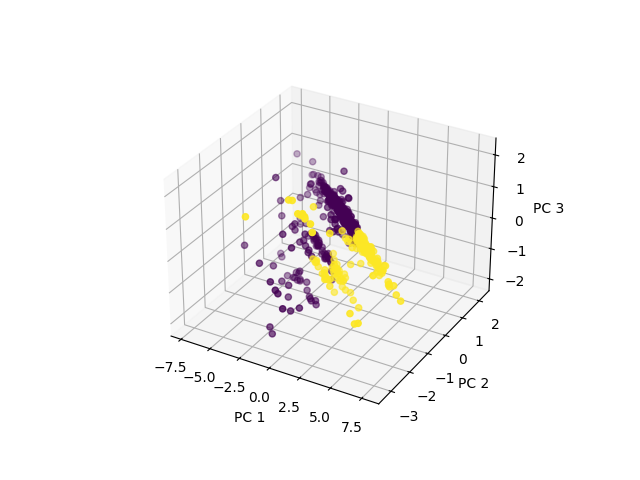

In [273]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC_1'], df_pca['PC_2'], df_pca['PC_3'], c=aggmodel_pred)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

Well that doesnøt seem to agree either. Lets try running a DBSCAN

In [294]:
#DBSCAN for automatically determining amount of clusters
# Tried to play a little around with eps here
dbscan = DBSCAN(eps=0.6, min_samples=15)
dbscan_pred = dbscan.fit_predict(df_pca)
dbscan_pred

array([-1, -1, -1, ..., -1, -1, -1], shape=(1272,))

Text(0.5, 0, 'PC 3')

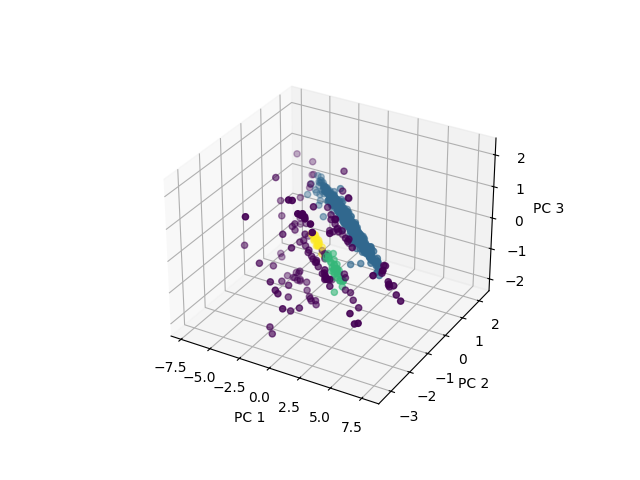

In [295]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC_1'], df_pca['PC_2'], df_pca['PC_3'], c=dbscan_pred)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

The DBSCAN clustering seems to yield the best results so far. There's a clear large cluster, showing the correlation between PC1 and PC2. To smaller cluster showing a concentration of data points in the same correlation between PC1 and PC2, but is offset on PC3. Showing 2 potential subcategories of data along the axis of PC3.

The rest of the datapoints is classified as outliters by the algorithm